In [1]:
import os
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

from utils import describe_ts, draw_resampled, cluster_ts, plot_clustered_series, calculate_tau, calculate_slope

c:\Users\User\.conda\envs\tsururu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\User\.conda\envs\tsururu\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
CURRENT_DIR = pathlib.Path(os.getcwd()).parent
DATA_DIR = CURRENT_DIR / "data"

В этом ноутбуке рассмотрены датасеты: 

Если в датасете много рядов, и анализ в таком виде затруднителен, то мы прибегали к кластеризации рядов путем KMeans и DTW ([Dynamic Time Warping](https://rtavenar.github.io/blog/dtw.html)). Для определения оптимального числа кластеров мы использовали [Silhouette Score](https://tslearn.readthedocs.io/en/latest/gen_modules/clustering/tslearn.clustering.silhouette_score.html).


### ECL: Electricity Consuming Load

Contains hourly electricity consumption (in Kwh) of 321 clients in two years.

In [3]:
ecl = pd.read_csv(DATA_DIR / "ecl.csv", parse_dates=["date"])
ecl.head()

,date,id,value
0,2012-01-01 00:00:00,0,14.0
1,2012-01-01 01:00:00,0,18.0
2,2012-01-01 02:00:00,0,21.0
3,2012-01-01 03:00:00,0,20.0
4,2012-01-01 04:00:00,0,22.0


In [4]:
describe_ts(ecl)

Число рядов: 321
Наблюдений в ряде: [26304]
Частота ряда: hourly
Минимальная дата в ряде: 2012-01-01 00:00:00
Максимальная дата в ряде: 2014-12-31 23:00:00, 

count    8.443584e+06
mean     2.538792e+03
std      1.502757e+04
min      0.000000e+00
25%      2.410000e+02
50%      5.500000e+02
75%      1.387000e+03
max      7.640000e+05
Name: value, dtype: float64


Рядов много. Попробуем их кластеризовать.

In [8]:
ecl[ecl["date"] <= "2012-03-01"]

,date,id,value
0,2012-01-01 00:00:00,0,14.0
1,2012-01-01 01:00:00,0,18.0
2,2012-01-01 02:00:00,0,21.0
3,2012-01-01 03:00:00,0,20.0
4,2012-01-01 04:00:00,0,22.0
...,...,...,...
8418716,2012-02-29 20:00:00,320,3400.0
8418717,2012-02-29 21:00:00,320,3521.0
8418718,2012-02-29 22:00:00,320,3443.0
8418719,2012-02-29 23:00:00,320,3579.0


In [10]:
df_new = cluster_ts(
    data=ecl[ecl["date"] <= "2012-03-01"],
    metric="dtw",
    n_clusters=3,
    n_jobs=-1,
)

KeyboardInterrupt: 

In [ ]:
plot_clustered_series(df_new, 3, n_series=5)

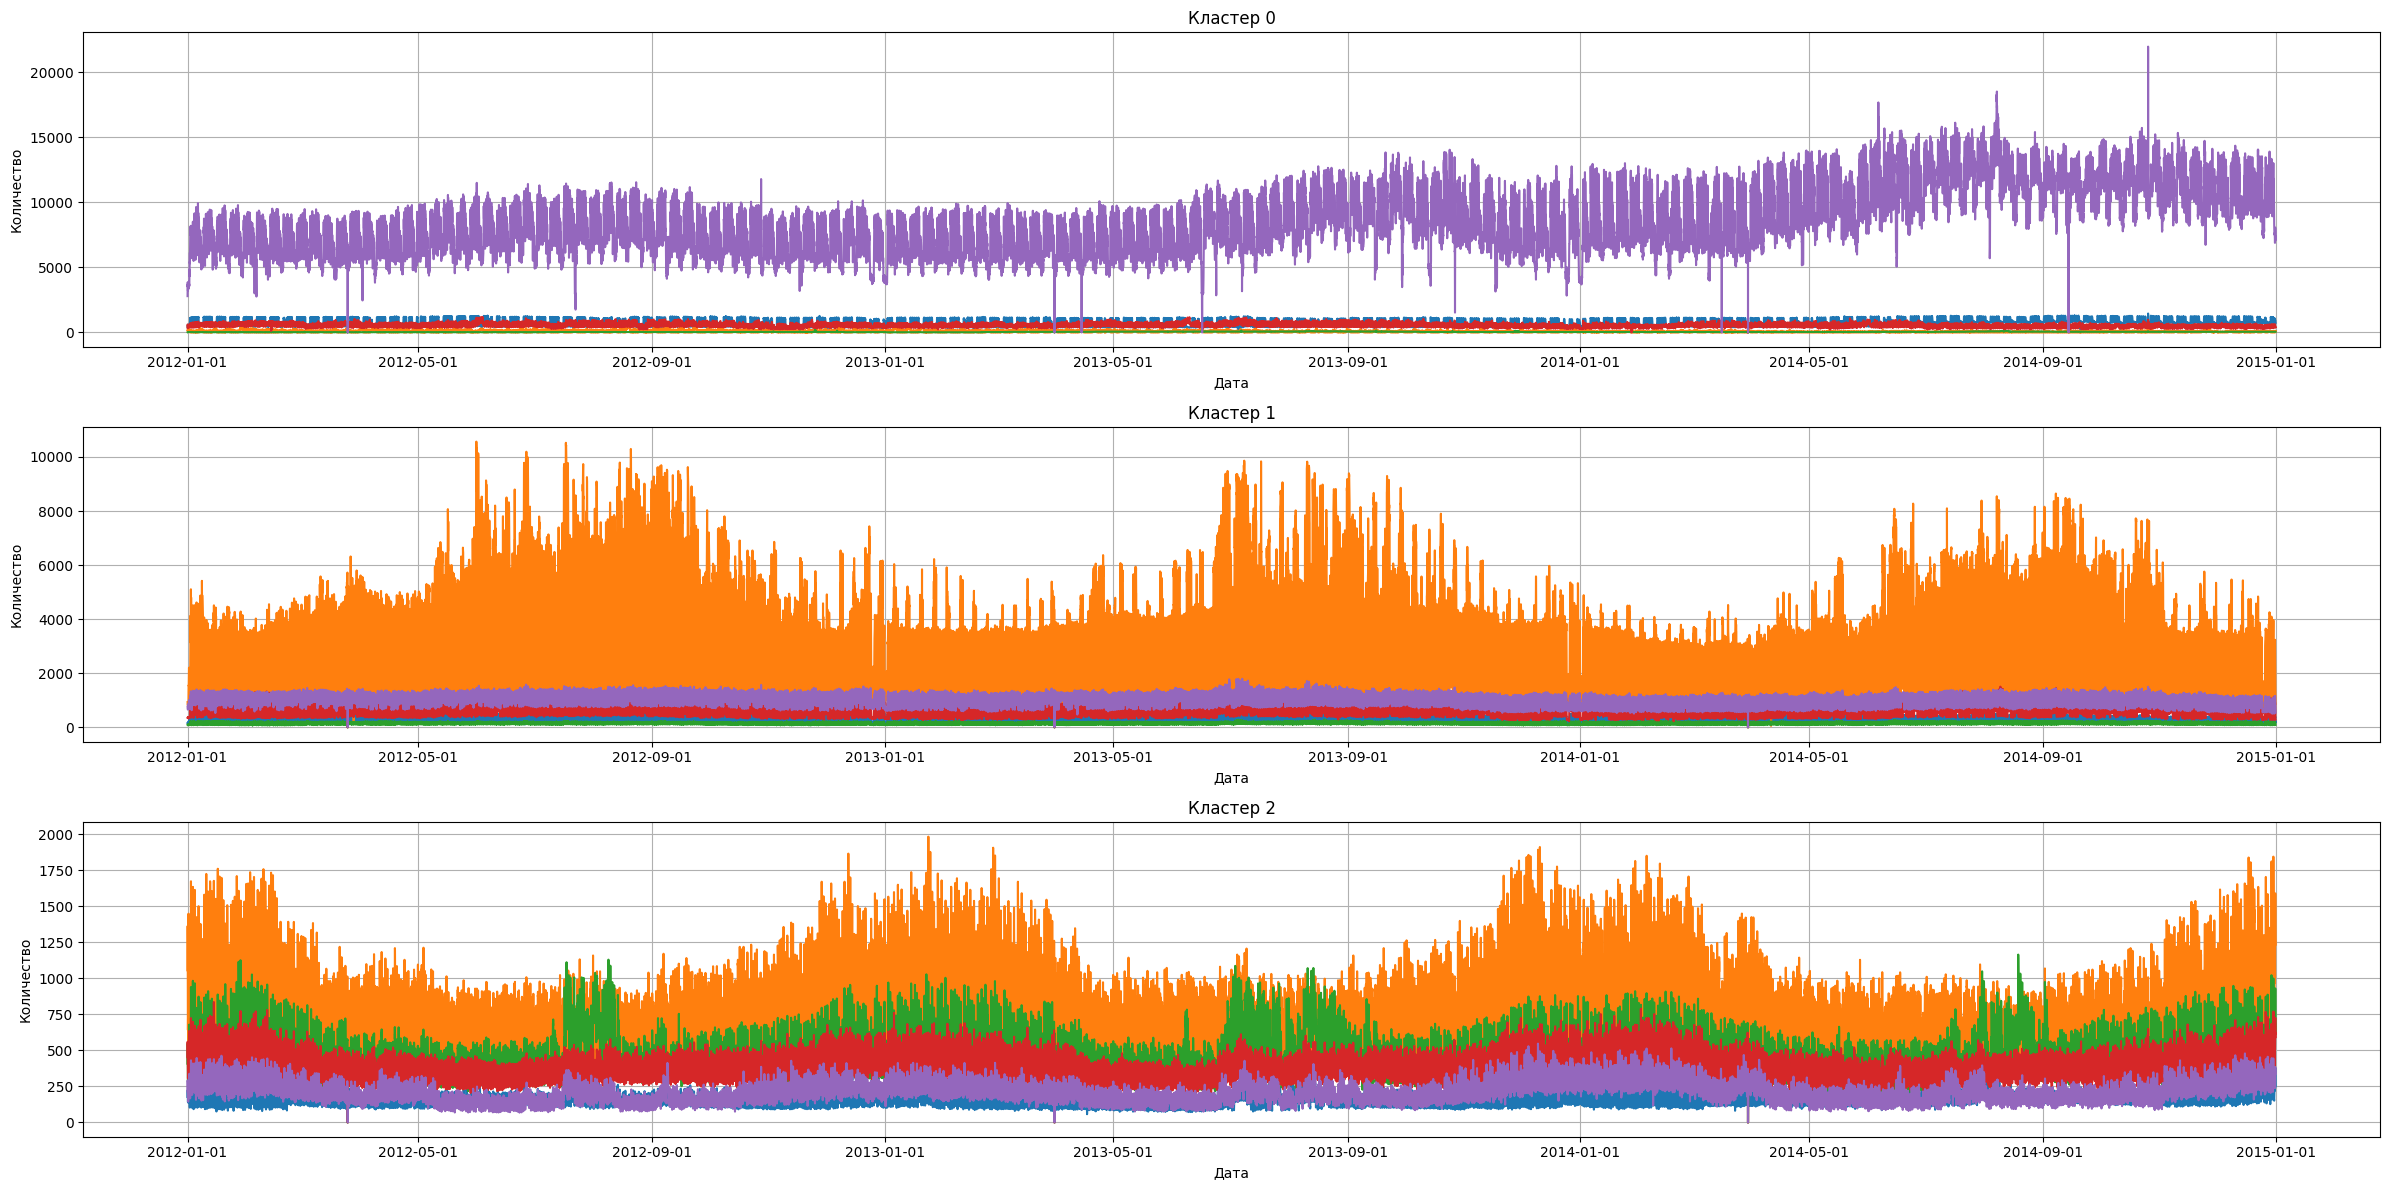

In [6]:
plot_clustered_series(df_new, 3, n_series=5)